In [3]:
from ppktstore.registry import configure_phenopacket_registry
from ppktstore.model import DefaultPhenopacketStore
from ppktstore.release.stats import PPKtStoreStats
import typing

Method 1

In [8]:
registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.22") as ps:
   phenopackets = list(ps.iter_cohort_phenopackets("FBN1"))
print(phenopackets[2])

id: "PMID_33576469_Patient_4"
subject {
  id: "Patient 4"
  time_at_last_encounter {
    age {
      iso8601duration: "P3Y"
    }
  }
  sex: MALE
}
phenotypic_features {
  type {
    id: "HP:0001083"
    label: "Ectopia lentis"
  }
}
phenotypic_features {
  type {
    id: "HP:0000545"
    label: "Myopia"
  }
}
phenotypic_features {
  type {
    id: "HP:0000501"
    label: "Glaucoma"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0000486"
    label: "Strabismus"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0000098"
    label: "Tall stature"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0002650"
    label: "Scoliosis"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0001382"
    label: "Joint hypermobility"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0000767"
    label: "Pectus excavatum"
  }
  excluded: true
}
phenotypic_features {
  type {
    id: "HP:0001166"
    label: "Arachnodactyly"


In [ ]:
print(f"Number of patients by FBN1: {len(phenopackets)}")

Number of patients: 144


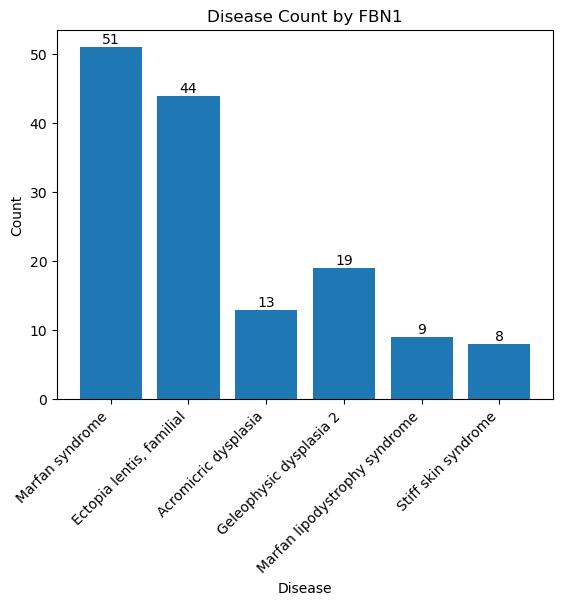

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
def diseases_count_table(phenopackets):
    diseases= []
    for phenopacket in phenopackets:
        if len(phenopacket.diseases) == 0:
            raise ValueError("Empty disease list")
        if len(phenopacket.diseases) != 1:
            print("Warning, number of diseases ", len(phenopacket.diseases))
        #if len(phenopacket.diseases) == 1:
        diseases.append(phenopacket.diseases[0].term.label)
    return Counter(diseases)

diseases_count = diseases_count_table(phenopackets)

labels = list(diseases_count.keys())
counts = list(diseases_count.values())

# plot graph to show diseases and count
plt.bar(labels, counts)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Count by FBN1')
plt.xticks(rotation=45, ha="right") 
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom') 
plt.show()



In [ ]:
def HPO_count_table(phenopackets):
    HPOs= set()
    for phenopacket in phenopackets:
        if len(phenopacket.phenotypic_features) == 0:
            raise ValueError("Empty disease list")
        for phenotype in phenopacket.phenotypic_features:
            HPOs.add(phenotype.type.label)
    return len(HPOs)

HPOs_count = HPO_count_table(phenopackets)
print(f'Number of distinct HPOs by FBN1: {HPOs_count}')

Number of distinct HPOs by FBN1: 109


Method 2

In [ ]:
def filter_cohorts(
    store: DefaultPhenopacketStore,
    cohort_names: typing.List[str]
) -> DefaultPhenopacketStore:
    """
    Filter cohorts from a DefaultPhenopacketStore by specified cohort names.

    :param store: Original DefaultPhenopacketStore instance.
    :param cohort_names: List of cohort names to include in the new store.
    :return: A new DefaultPhenopacketStore containing only the specified cohorts.
    """
    # Filter the cohorts based on the provided list of cohort names
    filtered_cohorts = [
        cohort for cohort in store.cohorts() if cohort.name in cohort_names
    ]

    # Return a new DefaultPhenopacketStore with the filtered cohorts
    return DefaultPhenopacketStore(
        name=f"{store.name}_filtered",  
        path=store.path, 
        cohorts=filtered_cohorts,  # only the filtered cohorts
    )


registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.22") as ps:
    phenopackets = filter_cohorts(
    store=ps,  
    cohort_names=["FBN1"]  # Build a new phenopacketstore with cohort FBN1
    )
    stats = PPKtStoreStats(phenopackets)
    df = stats.get_summary_df()
    print(df.head())
    print(f'Number of patients by FBN1: {df.shape[0]}')
    diseases_count = stats.get_counts_per_disease_df()
    print(f'Number of Diseases by FBN1: {diseases_count}')
    HPOs_count = stats._get_total_and_unique_hpo_counts(phenopackets)
    print(f'Number of distinct HPOs by FBN1: {HPOs_count}')


     patient_id cohort   disease_id                   disease  gene  \
0   Patient D62   FBN1  OMIM:154700           Marfan syndrome  FBN1   
1   Patient B47   FBN1  OMIM:154700           Marfan syndrome  FBN1   
2     Patient 4   FBN1  OMIM:129600  Ectopia lentis, familial  FBN1   
3   Patient D19   FBN1  OMIM:154700           Marfan syndrome  FBN1   
4  AD Family 20   FBN1  OMIM:102370      Acromicric dysplasia  FBN1   

                  allele_1 allele_2           PMID  \
0    NM_000138.5:c.2047T>C           PMID:12203992   
1    NM_000138.5:c.3058A>G           PMID:11175294   
2    NM_000138.5:c.1879C>T           PMID:33576469   
3  NM_000138.5:c.5422+1G>A           PMID:12203992   
4    NM_000138.5:c.5182G>A           PMID:21683322   

                                            filename  
0  C:\Users\Lenovo\phenopacket-store\0.1.22.zip/....  
1  C:\Users\Lenovo\phenopacket-store\0.1.22.zip/....  
2  C:\Users\Lenovo\phenopacket-store\0.1.22.zip/....  
3  C:\Users\Lenovo\phenopack